In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('./taylor_summary.csv', header=0)
data.head()

,Config,InputLinear,k_hat,G(context),k_v_sum,t_D,T_N,z,CompTotal,reduce1,reduce2,gather,Total
0,W1_N2048_D64_H4_B16,0.8181,0.2090,0.2704,0.1173,0.2083,0.3243,0.1185,2.0659,0.0167,0.1181,0.0168,2.2176
1,W2_N2048_D64_H4_B16,0.8169,0.1762,0.2008,0.1054,0.2744,0.2599,0.1227,1.9563,0.2530,0.2816,0.6742,3.1652
2,W4_N2048_D64_H4_B16,0.7906,0.1456,0.1727,0.0865,0.2743,0.2246,0.1194,1.8137,0.5152,0.3056,0.9670,3.6014
3,W1_N1024_D64_H4_B16,0.7236,0.1361,0.1621,0.0875,0.1892,0.2106,0.0937,1.6030,0.0162,0.1139,0.0164,1.7494
4,W2_N1024_D64_H4_B16,0.8029,0.1449,0.1677,0.0842,0.2702,0.2246,0.1174,1.8119,0.2879,0.2991,0.5248,2.9236


Text(0.5, 1.0, 'G(context) Strong Scaling')

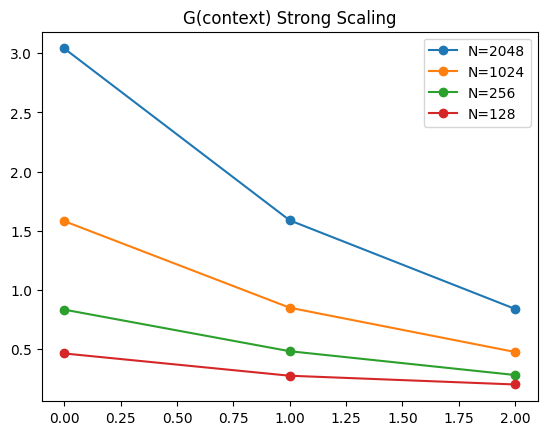

In [35]:
data_b256 = data.iloc[24:]
G_strong = np.array(data_b256[' G(context)'])[:12]
N = [2048, 1024, 256, 128]
lgd = [f'N={n}' for n in N]
for i in range(4):
    plt.plot(G_strong[(i*3):(i*3+3)], '-o')
plt.legend(lgd)
plt.title('G(context) Strong Scaling')

In [36]:
np.array(data_b256[' G(context)'])[:12]

array([3.0397, 1.5876, 0.8388, 1.5809, 0.8493, 0.4751, 0.8332, 0.4818,
       0.2807, 0.4628, 0.2747, 0.2008])

Text(0.5, 1.0, 'G(context) weak scaling')

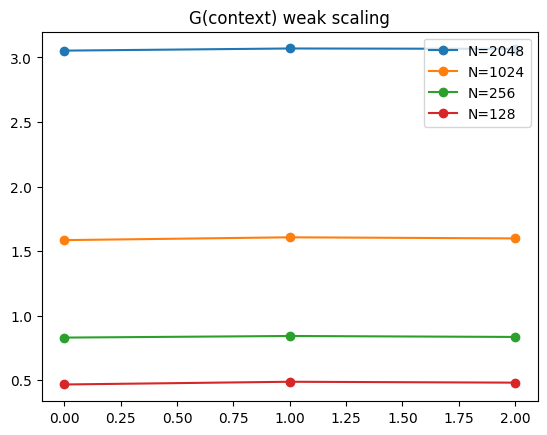

In [37]:
G_weak = np.array(data_b256[' G(context)'])[12:]
for i in range(4):
    plt.plot(G_weak[(i*3):(i*3+3)], '-o')
plt.legend(lgd)
plt.title('G(context) weak scaling')

Text(0.5, 1.0, 'Computation Time Strong Scaling')

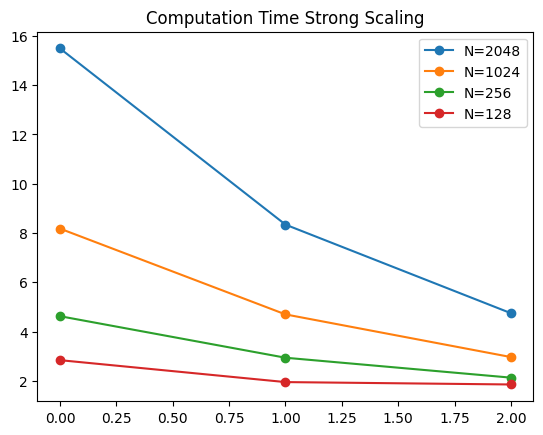

In [38]:
data_b256 = data.iloc[24:]
Comp_strong = np.array(data_b256[' CompTotal'])[:12]
N = [2048, 1024, 256, 128]
lgd = [f'N={n}' for n in N]
for i in range(4):
    plt.plot(Comp_strong[(i*3):(i*3+3)], '-o')
plt.legend(lgd)
plt.title('Computation Time Strong Scaling')

Text(0.5, 1.0, 'Computation Time Weak Scaling')

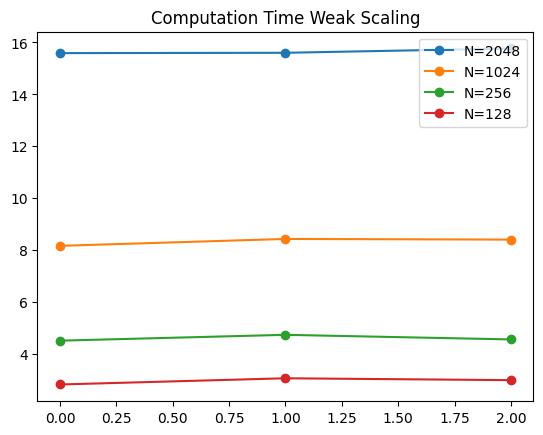

In [39]:
Comp_weak = np.array(data_b256[' CompTotal'])[12:]
for i in range(4):
    plt.plot(Comp_weak[(i*3):(i*3+3)], '-o')
plt.legend(lgd)
plt.title('Computation Time Weak Scaling')

# Vanilla

In [43]:
data_v = pd.read_csv('./vanilla_log.csv', header=0)
data_v.head()

,Config,InputLinear,QKT,Softmax,SV,OutputLinear,CompTotal,Gather,CUDATotal
0,W1_N2048_D64_H4_B4,0.4882,1.5692,1.6666,2.1314,0.1034,5.9588,0.0459,6.0047
1,W2_N2048_D64_H4_B4,0.5084,0.8412,0.8477,1.1922,0.0828,3.4722,0.6566,4.1288
2,W4_N2048_D64_H4_B4,0.5176,0.4724,0.4457,0.6191,0.0813,2.1361,1.1554,3.2915
3,W1_N1024_D64_H4_B4,0.4757,0.4551,0.2876,0.6299,0.0792,1.9275,0.0431,1.9706
4,W2_N1024_D64_H4_B4,0.4862,0.2775,0.1646,0.3313,0.0775,1.3370,0.3944,1.7314


Text(0.5, 1.0, 'Computation Time Strong Scaling')

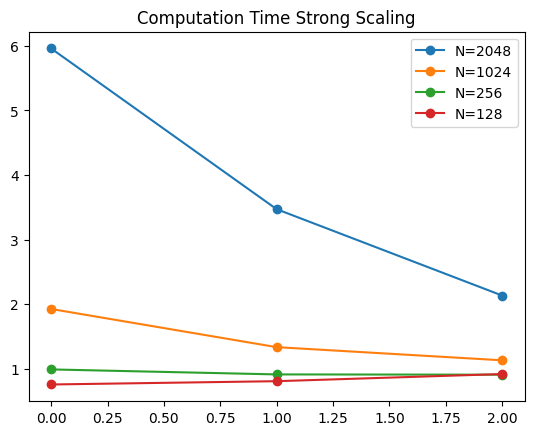

In [44]:
Comp_strong = np.array(data_v['CompTotal'])[:12]
N = [2048, 1024, 256, 128]
lgd = [f'N={n}' for n in N]
for i in range(4):
    plt.plot(Comp_strong[(i*3):(i*3+3)], '-o')
plt.legend(lgd)
plt.title('Computation Time Strong Scaling')

Text(0.5, 1.0, 'Computation Time Weak Scaling')

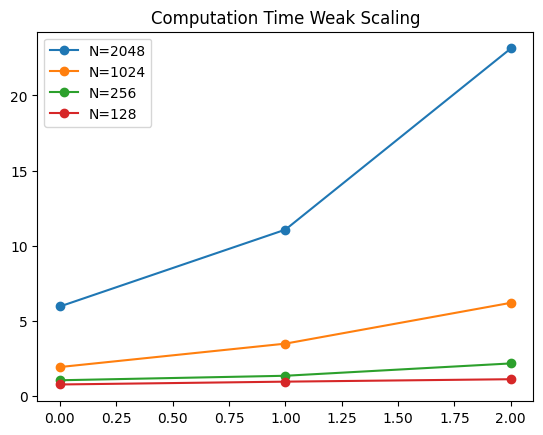

In [45]:
Comp_weak = np.array(data_v['CompTotal'])[12:]
for i in range(4):
    plt.plot(Comp_weak[(i*3):(i*3+3)], '-o')
plt.legend(lgd)
plt.title('Computation Time Weak Scaling')

In [ ]:
data_v = pd.read_csv('./vanilla_8gpu.csv', header=0)
data_v.head()

In [ ]:
Comp_strong = np.array(data_v['CompTotal'])[:16]
N = [2048, 1024, 256, 128]
lgd = [f'N={n}' for n in N]
for i in range(4):
    plt.plot(Comp_strong[(i*4):(i*4+4)], '-o')
plt.legend(lgd)
plt.title('Computation Time Strong Scaling')

In [ ]:
Comp_weak = np.array(data_v['CompTotal'])[16:]
for i in range(4):
    plt.plot(Comp_weak[(i*4):(i*4+4)], '-o')
plt.legend(lgd)
plt.title('Computation Time Weak Scaling')